# Premixed Flame Propagation in a Constant-Volume Chamber: A Two-Zone Model

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 12 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 3 March 2020.

The objectives of this tutorial are to introduce a simplified two-zone model for premixed flame propagation, and to exercise the model to illustrate laminar and turbulent flame propagation. Although the model as implemented is limited to flame propagation in a constant-volume combustion chamber, the model is a formulated in a way that lends itself to being extended as a simplified model for combustion in a homogeneous-charge spark-ignition piston engine. The model is exercised to illustrate some engine-relevant phenomena. The reading in of a previously generated Pandas DataFrame table is demonstrated. We will use the thermodynamic properties that are included in nasa.cti.

The files "pancake_engine.png" and "two_zone_equations.png" (image files) must be placed in a folder or directory named "images" that is immediately below the folder or directory from which you have opened this Notebook. If you downloaded the .zip file that contains all of the tutorial Notebooks, the appropriate folder and file structure should be in place.

The reader should be familiar with the material in the earlier chapter Notebooks before working through this Notebook.

## 1. Model description

### 1.1 Combustion process and geometric configuration

The combustion process in a constant-volume combustion chamber that is initially filled with a homogeneous premixed fuel-air reactant mixture can, for some purposes, be idealized as the propagation of a spherical flame centered at a point ignition site. This is the case for both laminar and premixed flame propagation. The flame, which occupies negligible volume, separates the unburned gas (reactants) from the burned gas (products). The temperature and composition in each of these two "zones" are approximately uniform at any instant in time $t$: for example, a single temperature $T_u(t)$ characterizes the unburned gas, and a different temperature $T_b(t)$ characterizes the burned gas. The pressure in the unburned gas is approximately equal to that in the burned gas: $P_u(t) = P_b(t) = P(t)$. The total volume $ V = V_u(t) + V_b(t) $ remains constant during flame propagation. As the flame propagates, it eventually intersects the combustion-chamber walls; thus the active flame area at any time $t$ includes only those parts of the sphere that have not yet encountered a boundary of the combustion chamber. This is illustrated for the case of a right-circular-cylinder combustion chamber in the figure below. 

<img src="images/pancake_engine.png" alt="Two-zone model of premixed flame propagation" style="width: 700px;"/>

This can be thought of as a first approximation of the combustion process in a "pancake" (flat head and piston) spark-ignition homogeneous-charge piston engine. In an engine, the independent variable is usually taken to be crank-angle degrees (CAD) of crankshaft rotation $ \theta $, rather than time $t$. The two are related simply through the crankshaft rotational speed $ \Omega_{CS} $ as follows, where $ \theta $ is in degrees, $t$ is in seconds, and $ \Omega _ {CS} $ is in revolutions per minute:

$$ \theta = \theta _ 0 + 6 \Omega _ {CS} ( t - t _ 0 ) $$

where $ \theta _ 0 $ is the crank position at time $ t_0 $. In a spark-ignition engine, ignition typically occurs 20-25 CAD before piston top-dead-center (TDC), and is completed (no unburned gas remaining) by 30 CAD after TDC. The volume is not constant in an engine. However, since combustion occurs over a short period around TDC, the volume change is relatively small. The constant-volume model that is implemented here can be readily adapted to account for a time-varying combustion-chamber volume, then applied as a more realistic (but still simplified) model of combustion in a homogeneous-charge spark-ignition engine.

### 1.2 Governing equations

The governing equations are written here using time as the independent variable. Then in Section 2 below, we will set up the problem and look at the results in terms of crank-angle degrees of rotation, to emphasize the eventual relevance to engines.

To derive the governing equations, two key physical principles are invoked: conservation of mass, and conservation of energy. In addition, fluid properties need to be specified; here we assume ideal-gas mixtures. Other key simplifications/assumptions are as follows:

*	The combustion chamber is a right circular cylinder of height $h$ and diameter $b$.

*	The flame is a sphere of radius $r_b = r_b(t)$ that propagates from the ignition site, which is necessarily inside of the cylinder. Surface elements on the sphere that have reached a solid wall no longer participate in burning. Combustion is complete when all unburned gas has been converted to burned gas: that is, when the sphere completely encloses the right circular cylinder.

*	The flame itself occupies negligible volume.

*	The total volume remains constant during flame propagation: $V_u(t) + V_b(t) = V = constant$.

*	The total mass remains constant during flame propagation: $m_u(t) + m_b(t) = m = constant $. In the engine context, this corresponds to assuming no leakage past the piston rings or valves.

*	The pressure remains spatially uniform, so that a single time-varying mixture pressure is used: $P_u(t) = P_b(t) = P(t)$.

*	The unburned-gas and the burned-gas zones each can be treated as a homogeneous (spatially uniform) ideal-gas mixture with gas constants $R_u$ and $R_b$ (J/kg-K), respectively. Thus a single temperature $T_u(t) $ (K) and mass-specific internal energy $u_u(t)$ (J/kg) characterize the unburned gas; and a different temperature $T_b(t)$ and internal energy $u_b(t)$ characterize the burned gas.

*	There is negligible heat transfer between the unburned gas and the burned gas.

*	The rate of heat transfer from the unburned gas to the walls is $ \dot Q _ u (t)$ (W), and the rate of heat transfer from the burned gas to the walls is $ \dot Q _ b (t)$. These heat transfer rates are known functions of time, and are related to the temperature difference between the gas and the wall through a heat-transfer coefficient $h$: $ \dot Q _ u = h ( T_u - T_{wall} ) A_ u $, where $ A_u = A_u (t) $ is the wall surface area that is exposed to unburned gas, and similarly for $ \dot Q _ b $.

*	The mass rate of conversion from unburned gas to burned gas (the mass burning rate) is $\dot m (t)$ (kg/s). The burning rate is expressed in terms of the unburned gas mass density $ \rho _ u ( t ) $, the flame area $ A_{flame} (t) $, and a flame speed $s_{flame} (t) $ with respect to the unburned gases as $ \dot m = \rho _ u s_{flame} A_{flame} $, where $ A_{flame} (t) $ is simply the area of the sphere of radius $ r_b (t) $ that is inside of the combustion chamber. It is important to note that $ s_{flame} \ne d r_b / dt $, because of volume expansion of the burned gases behind the flame. The same partial-sphere flame area is used for both laminar and turbulent premixed flame propagation; the difference is in the specification of $s_{flame} (t) $. For laminar flame propagation, a simple flame-speed correlation is used for the laminar flame speed. For turbulent flame propagation, the flame speed is augmented by an amount that is proportional to the root-mean-square turbulence velocity fluctuation in the combustion chamber, $ u ' $. For a piston engine, $ u ' $ is proportional to the mean piston speed. 

*	The composition of the unburned gas is known and constant (specified fuel-air reactant mixture). The unburned-gas temperature, pressure, and other thermodynamic properties do vary with time, however.

*	The burned gases are assumed to be in chemical equilibrium corresponding to the instantaneous burned-gas temperature and pressure, and the known reactant composition. To initialize the simulation (i.e., to model ignition), a small sphere of burned gas centered at the ignition location is specified at time $ t = t_0 $.

*	Changes in kinetic and potential energy are negligible.

With these specifications, the four principal ordinary differential equations (ODEs) governing the system can be written as follows, where a dot over a quantity denotes a time derivative:

<img src="images/two_zone_equations.png" alt="Two-zone equations" style="width: 800px;"/>

Note that only thermodynamic property data are needed to solve this problem; transport properties and a reaction mechanism are not needed, since we use simple flame-speed correlations. Further information can be found in the comments for the code that is provided in Section 2 below. And further information on two-zone models for spark-ignition engine combustion can be found in: J.N. Mattavi & C.A. Amann, Eds., Combustion Modeling in Reciprocating Engines, Plenum Press, New York (1980); and in
G.L. Borman & K.W. Ragland, Combustion Engineering, McGraw-Hill, New York (1998).


## 2. Cantera implementation

As was the case for the system considered in Cantera tutorial Notebook 10_1_1D_spray_combustion, no standard predefined Cantera object is available for this system. We therefore code the appropriate system of coupled nonlinear ordinary differential equations (ODEs) and ancillary algebraic equations directly, and solve them using [`solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

Here we consider premixed propane-air reactant mixtures. The fuel/oxidizer mixture can be changed by making the appropriate changes to the code. The gas-phase mixture thermodynamic properties are taken from a Cantera input data file. And in the equilibrium calculations that are used to compute the burned-gas properties, only major species plus CO and H2 are considered.

### 2.1 Define the gas mixture

In [1]:
# import modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
import time

# print Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture using thermodynamic property data from nasa.cti
# limit the gas mixture to seven allowable species
species = {S.name: S for S in ct.Species.listFromFile('nasa.cti')}
seven_species = [species[S] for S in ('C3H8','O2','N2','CO2','H2O','CO','H2')]
gas     = ct.Solution(thermo='IdealGas',species=seven_species) 

In [3]:
# check the temperature range over which the property data are intended to be used
gas.min_temp, gas.max_temp

(200.0, 6000.0)

In [4]:
# confirm that we have the desired set of allowable species
gas.species()

[<Species C3H8>,
 <Species O2>,
 <Species N2>,
 <Species CO2>,
 <Species H2O>,
 <Species CO>,
 <Species H2>]

### 2.2 Specify the geometric configuration and operating condition

In this subsection, the specific problem that is to be solved is defined. As mentioned in Section 1 above, we use crank-angle degrees of rotation as the independent variable instead of time, to facilitate interpretation of the results in terms of combustion in a homogeneous-charge spark-ignition piston engine.

In [5]:
##### user-specified quantitites #####

# engine geometric dimensions
bore   = 0.086           # (m) - bore (diameter of the right-circular-cylinder combustion chamber)
stroke = 0.086           # (m) - stroke (used together with rpm to compute mean piston speed)
clear  = 0.00956         # (m) - TDC clearance height (height of the right-circular-cylinder combustion chamber)

# spark location
# the coordinate system origin is at the center of the circle corresponding to the top of the right-circular-cylinder
#   combustion chamber (the "head" of the engine)
xign =  0.0              # (m) - x location
yign =  0.0              # (m) - y location
zign = -0.003            # (m) - z location

# homogeneous premixed reactants
fuel = 'C3H8'            # fuel composition
air  = 'O2:1.0,N2:3.76'  # oxidizer (air) composition
phi  = 1.0               # equivalence ratio

# other operating-condition parameters
rpm   = 2000.            # (r/min) - crankshaft rotational speed
caign = -25.             # (CAD)   - ignition time, in crank-angle degrees before TDC
Vign  = 1.e-9            # (m^3)   - ignition volume, which is the initial burned-gas volume
P0    = 2.025500e+6      # (Pa)    - pressure at ignition time
T0    = 700.             # (K)     - unburned reactants temperature at ignition time

# wall heat transfer model parameters
Twall = 400.             # (K) - wall temperature
ch    = 0.               # (W/m^2-K-rpm) - wall heat transfer coefficient - see Wall_Heat_Transfer_Rates_Engine

# flame propagation model
kflame = 2               # flame propagation model selection - see Mass_Burning_Rate_Engine

# computational time step and end time
dCA = 0.01               # (CAD) - time step in crank-angle-degrees of rotation
CAf = 30.                # (CAD) - final time in crank-angle degrees of rotation

# parameter controlling discretization for the flame table
ninc =  50               # see Create_Flame_Table_Pancake_Engine

In [6]:
##### derived quantitites #####

# computational time step
dtim = dCA / ( 6.*rpm )                                           # (s) - computational time step in seconds

# initial and final crank angles and times
ca0  = caign                                                      # (CAD) - begin at the time of ignition
caf  = CAf                                                        # (CAD) - end at the specified end time in CAD
tim0 = 0.                                                         # (s)   - initial time in seconds
timf = ( caf - ca0 ) / ( 6.*rpm )                                 # (s)   - final time in seconds

# reactant stoichiometry
xfuel     = gas.n_atoms(fuel,'C')                                 # number of carbon atoms in the fuel molecule
yfuel     = gas.n_atoms(fuel,'H')                                 # number of hydrogen atoms in the fuel molecule
a_st      = xfuel + yfuel/4.                                      # moles O2 per mole fuel, for stoichiometric reactants
n_air_st  = 4.76*a_st                                             # moles air per mole fuel, for stoichiometric reactants
mw_fuel   = gas.molecular_weights[gas.species_index(fuel)]        # (kg/kmol) - fuel molecular weight
mw_air    = 0.21*gas.molecular_weights[gas.species_index('O2')] \
          + 0.79*gas.molecular_weights[gas.species_index('N2')]   # (kg/kmol) - air molecular weight
FA_stoich = mw_fuel / ( n_air_st*mw_air )                         # stoichiometric fuel/air mass ratio

FA        = phi*FA_stoich                                         # actual fuel/air mass ratio
n_air     = n_air_st / phi                                        # actual moles of air per mole of fuel
x_fuel    =    1. / ( 1. + n_air )                                # mole fraction of fuel in reactants
x_air     = n_air / ( 1. + n_air )                                # mole fraction of air in reactants

mw_reac   = x_fuel*mw_fuel + x_air*mw_air                         # (kg/kmol) - reactants molecular weight
R_u       = ct.gas_constant / mw_reac                             # (J/kg-K)  - reactants gas constant

# adiabatic flame temperature and equilibrium product composition based on given fuel, air, phi, P0, and T0
gas.TP = T0,P0
gas.set_equivalence_ratio(phi,fuel,air)
gas.equilibrate('HP')
tadign = gas.T  # (K) - this is the initial burned-gas temperature, which will be assigned within the ignition volume

# print some quantitites to confirm setup
mw_fuel , mw_air , mw_reac , 1./FA , R_u , tadign

(44.09652,
 28.8503972,
 29.465160216129032,
 15.571284386160176,
 282.1794295029395,
 2584.705158967949)

### 2.3 Define functions

In this subsection, key functions are defined that are needed to solve the problem. The shape of the combustion chamber can be changed by replacing the function Create_Flame_Table_Pancake_Engine with a function the generates an equivalent table for the geometry of interest.

In [7]:
# define a function that creates a table of the following quantities as a function of the flame radius rflame (m):
#   burned-gas volume                                         - vburned  (m^3)
#   active flame surface area                                 - aburning (m^2)
#   wall area of combustion chamber exposed to burned gases   - careab   (m^2)
#   wall area of combustion chamber exposed to unburned gases - careau   (m^2)
# input arguments:
#   ninc       - number of increments to be used in discretizing the flame and the combustion chamber
#   bore       - bore diameter (m)
#   clear      - clearance height (m)
#   xign       - x position of ignition (m)
#   yign       - y position of ignition (m)
#   zign       - z position of ignition (m)
#   FlameTable - name of the flame table, which is a Pandas DataFrame that must be defined before calling this function
# function returns:
#   nflame     - number of flame radii in the flame table, where nflame is less than or equal to ninc
#   vchamb     - combustion chamber volume (m^3)
#   achamb     - combustion chamber wall surface area (m^2)
#   in addition to these return variables, the FlameTable is filled
# the coordinate system origin is at the center of the circle corresponding to the top of the right-circular-cylinder
#   combustion chamber (the "head" of the engine)
# the flame is assumed to be a sphere that is centered at the ignition location; the flame is discretized
#   using a spherical coordinate system centered at the ignition location
# the combustion chamber is a right circular cylinder with a diameter that is equal to the bore diameter
#   and a height that is equal to the TDC clearance height; the combustion chamber is discretized
#   using a polar cylindrical coordinate system
# ninc controls the discretization that is used: higher values of ninc give more accuracy, and 
#   correspondingly higher computational times
# a rather crude approach is used to perform the discretization, and the consequences of that can be seen in the
#   results, especially for the late burn

def Create_Flame_Table_Pancake_Engine(ninc,bore,clear,xign,yign,zign,FlameTable):
    
# the value of ninc determines the accuracy of the table, and the computational time required to generate the table
# higher values of ninc give higher accuracy and higher computational times
# higher values are especially important to give accurate late-burn results, when the flame is everywhere close
#   to a combustion-chamber wall
    
# discretization parameters
    nrad = ninc
    nthe = ninc
    nphi = ninc

    nrc = ninc
    ntc = ninc
    nzc = ninc

    rflmax = bore
    themax = 2.*np.pi
    phimax = np.pi

    rcyl  = 0.5*bore
    zcmin = -clear
    zcmax = 0.

    dr = rflmax / ( nrad - 1 )
    dt = themax / ( nthe - 1 )
    dp = phimax / ( nphi - 1 )

    drc = rcyl   / ( nrc - 1 )
    dtc = themax / ( ntc - 1 )
    dzc = clear  / ( nzc - 1 )

    achamb = 0.5*np.pi*bore*bore + np.pi*bore*clear
    vchamb = 0.25*np.pi*bore*bore*clear

    rflame   = np.zeros(nrad)
    aburning = np.zeros(nrad)
    vburned  = np.zeros(nrad)
    careab   = np.zeros(nrad)
    careau   = np.zeros(nrad)

    i           = 0
    rflame[i]   = 0.
    aburning[i] = 0.
    vburned[i]  = 0.
    careab[i]   = 0.
    careau[i]   = achamb
    
    r                 = rflame[i]
    FlameTable.loc[r] = vburned[i],aburning[i],careab[i],careau[i]

    vflin    = 0.
    vflout   = 0.
    test     = 1
    while test==1:
#        for i in range(1,nrad-1):
        for i in range(1,nrad):
            r      = i*dr
            aflin  = 0.
            aflout = 0.
            achin  = 0.
            achout = 0.
            aspher = 4.*np.pi*r*r
            vspher = 4.*np.pi*r*r*r / 3.
#            for j in range(1,nthe-1):
            for j in range(1,nthe):
                t    = j*dt
                sint = np.sin(t)
                cost = np.cos(t)
#                for k in range(1,nphi-1):
                for k in range(1,nphi):
                    p    = k*dp
                    sinp = np.sin(p)
                    cosp = np.cos(p)

                    x = xign + r*sinp*cost
                    y = yign + r*sinp*sint
                    z = zign + r*cosp

                    rg = np.sqrt( x**2 + y**2 )
  
                    da = r*r*sinp*dp*dt
                    dv = r*r*sinp*dr*dp*dt
                    if z>zcmin and z<zcmax and rg<rcyl:
                        aflin  = aflin  + da
                        vflin  = vflin  + dv
                    else:
                        aflout = aflout + da
                        vflout = vflout + dv
                
# end of loop over k
# end of loop over j

            aflsum = aflin + aflout
            vflsum = vflin + vflout

#  combustion chamber

#            for ii in range(0,nrc-1):
            for ii in range(0,nrc):
                rc = ii*drc
#                for jj in range(0,ntc-1):
                for jj in range(0,ntc):
                    tc    = jj*dtc
                    sintc = np.sin(tc)
                    costc = np.cos(tc)

#  bottom (piston)

                    xc = rc*costc
                    yc = rc*sintc
                    zc = zcmin

                    rf = np.sqrt( ( xc - xign )**2 + ( yc - yign )**2 + ( zc - zign )**2 )

                    dac = rc*dtc*drc

                    if rf<r:
                        achin  = achin  + dac
                    else:
                        achout = achout + dac

#  top (head)

                    zc = zcmax

                    rf = np.sqrt( ( xc - xign )**2 + ( yc - yign )**2 + ( zc - zign )**2 )

                    dac = rc*dtc*drc

                    if rf<r:
                        achin  = achin  + dac
                    else:
                        achout = achout + dac

# end of loop over jj
# end of loop over ii

#  side (liner)
            
            rc = rcyl
#            for kk in range(0,nzc-1):
            for kk in range(0,nzc):
                zc = zcmin + kk*dzc
#                for jj in range(0,ntc-1):
                for jj in range(0,ntc):
                    tc    = jj*dtc
                    sintc = np.sin(tc)
                    costc = np.cos(tc)

                    xc = rc*costc
                    yc = rc*sintc

                    rf = np.sqrt( ( xc - xign )**2 + ( yc - yign )**2 + ( zc - zign )**2 )

                    dac = rc*dzc*dtc

                    if rf<r:
                        achin  = achin  + dac
                    else:
                        achout = achout + dac

# end of loop over jj
# end of loop over kk

            achsum = achin + achout

            afracb = aflin  / ( aflin + aflout )
            vfracb = vflin  / ( vflin + vflout )
            cfracb = achin  / ( achin + achout )
            cfracu = achout / ( achin + achout )

            nflame      = i
            rflame[i]   = r
            aburning[i] = afracb*aspher
            vburned[i]  = vfracb*vspher
            careab[i]   = cfracb*achamb
            careau[i]   = cfracu*achamb
        
            FlameTable.loc[r] = vburned[i],aburning[i],careab[i],careau[i]
    
            if aflin==0.:
                test = 0
                break

# end of loop over i
# end of while loop

# force the last table entries to be consistent with the overall combustion chamber volume and surface area
    i           = i + 1
    nflame      = i
    rflame[i]   = r + dr
    aburning[i] = aburning[i-1]
    vburned[i]  = vchamb
    careab[i]   = achamb
    careau[i]   = 0.
    
    FlameTable.loc[r] = vburned[i],aburning[i],careab[i],careau[i]
    
# return the number of table entries, the total volume of the combustion chamber, and the total surface area
#   of the combustion chamber
    return nflame,vchamb,achamb

In [8]:
# define a function that returns flame area and combustion chamber wall areas for a given burned-gas volume
# input arguments:
#   nflame     - number of flame radii in the flame table, where nflame is less than or equal to ninc
#   vb         - burned-gas volume (m^3)
#   FlameTable - name of the flame table, which is a Pandas DataFrame that must be filled before calling this function
# function returns:
#   aflame     - active flame surface area (m^2)
#   awallb     - wall area of combustion chamber exposed to burned gases (m^2)
#   awallu     - wall area of combustion chamber exposed to unburned gases (m^2)
# simple linear interpolation is used
# this function is independent of the particular geometric configuration that is considered, as long as an appropriate
#   flame table has been generated for the configuration of interest

def Interpolate_Flame_Table(nflame,vb,FlameTable):
    if vb>FlameTable['vburned'].values[nflame-1]:
        aflame = FlameTable['aburning'].values[nflame-1]
        awallb = FlameTable['careab'].values[nflame-1]
        awallu = FlameTable['careau'].values[nflame-1]
    else:
        test = 1
        while test==1:
            for i in range(1,nflame):
                if FlameTable['vburned'].values[i]>=vb:
                    frac   = ( vb - FlameTable['vburned'].values[i-1] ) / \
                             ( FlameTable['vburned'].values[i] - FlameTable['vburned'].values[i-1] )
                    aflame = FlameTable['aburning'].values[i-1] \
                           + frac*( FlameTable['aburning'].values[i] - FlameTable['aburning'].values[i-1] )
                    awallb = FlameTable['careab'].values[i-1] \
                           + frac*( FlameTable['careab'].values[i] - FlameTable['careab'].values[i-1] )
                    awallu = FlameTable['careau'].values[i-1] \
                           + frac*( FlameTable['careau'].values[i] - FlameTable['careau'].values[i-1] )
                
                    test = 0
                    break
                
# end of loop over i
# end of while loop

# for the current burned-gas volume, return the active flame surface area, the wall area that is exposed to burned
#   gases, and the wall area that is exposed to unburned gases   
    return aflame,awallb,awallu

In [9]:
# define a function that computes the necessary unburned-gas mixture properties
# input arguments:
#   gas        - gas mixture
#   fuel       - fuel composition, which must be only species that are included in gas
#   air        - air  composition, which must be only species that are included in gas
#   phi        - equivalence ratio
#   T_u        - unburned-gas temperature (K)
#   P          - pressure (Pa)
# function returns:
#   uu         - unburned-gas internal energy per unit mass (J/kg)
#   cvu        - unburned-gas constant-volume specific heat per unit mass (J/kg-K)
#   ru         - unburned-gas gas constant (J/kg-K)
#   rhou       - unburned-gas mass density (kg/m^3)

def Unburned_Gas_Props(gas,fuel,air,phi,T_u,P):
    
# save the state of the gas mixture on entering this function
    T_0 = gas.T
    P_0 = gas.P
    X_0 = gas.X

# set the gas thermochemical state to correspond to the desired unburned-gas mixture state
    gas.TP = T_u,P
    gas.set_equivalence_ratio(phi,fuel,air)
    
# get the required unburned-gas mixture properties
    uu   = gas.int_energy_mass
    cvu  = gas.cv_mass
    ru   = ct.gas_constant / gas.mean_molecular_weight
    rhou = gas.density
    
# reset the gas mixture to its state on calling this function
    gas.TPX = T_0,P_0,X_0

# return the required unburned-gas properties
    return uu,cvu,ru,rhou

In [10]:
# define a function that computes the necessary burned-gas mixture properties
# input arguments:
#   gas        - gas mixture
#   fuel       - fuel composition, which must be only species that are included in gas
#   air        - air  composition, which must be only species that are included in gas
#   phi        - equivalence ratio
#   T_b        - burned-gas temperature (K)
#   P          - pressure (Pa)
# function returns:
#   ub         - burned-gas internal energy per unit mass (J/kg)
#   cvb        - burned-gas constant-volume specific heat per unit mass (J/kg-K)
#   rb         - burned-gas gas constant (J/kg-K)
#   rhob       - burned-gas mass density (kg/m^3)
#   dubdt      - burned-gas partial derivative of internal energy with respect to temperature (J/kg-K)
#   dubdp      - burned-gas partial derivative of internal energy with respect to pressure (J/kg-Pa)

def Burned_Gas_Props(gas,fuel,air,phi,T_b,P):

# specify the temperature and pressure increments to use for estimating partial derivatives
    dT = 1.  # (K)
    dP = 1.  # (Pa)
    
# save the state of the gas mixture on entering this function
    T_0 = gas.T
    P_0 = gas.P
    X_0 = gas.X

# set the gas thermochemical state to correspond to the desired unburned-gas mixture state, which is the equilibrium state
#   for the given reactant mixture at the current pressure and burned-gas temperature
    gas.TP = T_b,P
    gas.set_equivalence_ratio(phi,fuel,air)
    gas.equilibrate('TP')
    
# get the required burned-gas properties
    ub     = gas.int_energy_mass
    cvb    = gas.cv_mass
    rb     = ct.gas_constant / gas.mean_molecular_weight
    rhob   = gas.density
    
    Tnew   = T_b + dT
    gas.TP = Tnew,None
    gas.equilibrate('TP')
    ubnew  = gas.int_energy_mass
    dubdt  = ( ubnew - ub ) / dT
    
    Pnew   = P + dP
    gas.TP = T_b,Pnew
    gas.equilibrate('TP')
    ubnew  = gas.int_energy_mass
    dubdp  = ( ubnew - ub ) / dP
    
# reset the gas mixture to its state on calling this function
    gas.TPX = T_0,P_0,X_0

# return the required burned-gas mixture properties
    return ub,cvb,rb,rhob,dubdt,dubdp

In [11]:
# define a function that computes the wall heat transfer rates
# input arguments:
#   ch         - heat-transfer coefficient (W/m^2-K-rpm)
#   rpm        - crankshaft rotational speed (r/min)
#   tu         - unburned-gas temperature (K)
#   tb         - burned-gas temperature (K)
#   twall      - wall temperature (K)
#   awallu     - surface area of walls exposed to unburned gas (m^2)
#   awallb     - surface area of walls exposed to burned gas (m^2)
# function returns:
#   qdotu      - rate of heat transfer from the unburned gas to the walls (W)
#   qdotb      - rate of heat transfer from the burned gas to the walls (W)

def Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,twall,awallu,awallb):
    h     = ch*rpm
    qdotu = h*( tu - twall )*awallu
    qdotb = h*( tb - twall )*awallb
    
# return the rates of wall heat transfer
    return qdotu,qdotb

In [12]:
# define a function that computes the mass burning rate, which is the mass rate at which reactants are
#   converted to products
# input arguments:
#   kflame     - flame propagation model selection (laminar or turbulent)
#   phi        - equivalence ratio
#   tu         - unburned-gas temperature (K)
#   p          - pressure (Pa)
#   stroke     - engine stroke (m)
#   rpm        - crankshaft rotational speed (r/min)
#   rhou       - unburned-gas mass density (kg/m^3)
#   aflame     - flame surface area (m^2)
# function returns:
#   mdot       - mass rate of conversion from reactants to products (kg/s)

def Mass_Burning_Rate_Engine(kflame,phi,tu,p,stroke,rpm,rhou,aflame):
    
# compute the laminar flame speed using the metghalchi and keck (1982) flame-speed correlation,
#   for undiluted propane/air reactants

    phim  =  1.08
    bm    =  0.3422
    b2    = -1.3865
    ydil  =  0.0
    slref = bm + b2*( phi - phim )**2
    gamma =  2.18 - 0.80*( phi - 1. )
    beta  = -0.16 + 0.22*( phi - 1. )
    turef =    298.0
    pref  = 101325.0

    slam  = slref*( tu / turef )**gamma*(  p /  pref )**beta*(  1. - 2.1*ydil )

# compute flame speed enhancement resulting from turbulence

    vpist = stroke*rpm / 30. # mean piston speed (m/s)
    uprim = vpist            # rms turbulence velocity
    sturb = uprim            # flame-speed enhancement resulting from turbulence

    if kflame==1:
        seff = slam         # laminar 
    else:
        seff = slam + sturb # turbulent

    mdot = rhou*seff*aflame

# return the mass-burning rate
    return mdot

In [13]:
# define a function that initializes the simulation
# input arguments:
#   none
# function returns:
#   pall       - initial pressure (Pa)
#   vb         - initial burned-gas volume (m^3)
#   tu         - initial unburned-gas temperature (K)
#   tb         - initial burned-gas temperature (K)

def Initialize():
          
    tim  = tim0
    ca   = ca0
    vall = vchamb
    pall = P0
    tu   = T0
    tb   = tadign
    vb   = Vign
    vu   = vall - vb

# compute the initial flame area, wall area exposed to burned gas, and wall area exposed to unburned gas
    [aflame,awallb,awallu] = Interpolate_Flame_Table(nflame,vb,FlameTable)
    
# compute the initial unburned-gas mixture properties
    [uu,cvu,ru,rhou] = Unburned_Gas_Props(gas,fuel,air,phi,tu,pall)
    
# compute the initial burned-gas mixture properties
    [ub,cvb,rb,rhob,dubdt,dubdp] = Burned_Gas_Props(gas,fuel,air,phi,tb,pall)
    
# compute the initial wall heat transfer rates
    [qdotu,qdotb] = Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,Twall,awallu,awallb)
    
# compute the initial mass burning rate
    mdot = Mass_Burning_Rate_Engine(kflame,phi,tu,pall,stroke,rpm,rhou,aflame)
      
    return pall,vb,tu,tb

In [14]:
# define a function that computes the time-rate-of-change of quantities needed for the two-zone constant-volume premixed
#   flame propagation combustion model
# input arguments:
#   tim        - time (s)
#   dvars      - array of dependent variables for which ODEs are solved
#   parms      - array of parameters needed to solve the ODEs
# function returns:
#   f          - array of right-hand-sides for the ODEs that are solved

def Two_Zone_Equations(tim,dvars,parms):
    
# unpack dvars into local values of the dependent variables
    pall, vb , tu, tb = dvars
    
# unpack other quantitites/parameters needed
    gas, fuel, air, phi, FlameTable, vall, nflame, ch, rpm, Twall, kflame, stroke, tim0, ca0 = parms
         
# compute the current crank angle
    ca = 6.*rpm*( tim - tim0 ) + ca0
    
# compute the unburned-gas volume
    vu = vall - vb

# compute the flame area, wall area exposed to burned gas, and wall area exposed to unburned gas
    [aflame,awallb,awallu] = Interpolate_Flame_Table(nflame,vb,FlameTable)
    
# compute the required unburned-gas properties
    [uu,cvu,ru,rhou] = Unburned_Gas_Props(gas,fuel,air,phi,tu,pall)

# compute the required burned-gas properties
    [ub,cvb,rb,rhob,dubdt,dubdp] = Burned_Gas_Props(gas,fuel,air,phi,tb,pall)

# compute the wall heat transfer rates
    [qdotu,qdotb] = Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,Twall,awallu,awallb)

# compute the mass burning rate
    mdot = Mass_Burning_Rate_Engine(kflame,phi,tu,pall,stroke,rpm,rhou,aflame)
    
# compute the right-hand sides
    denom = cvu*tb*vall*dubdt + ( cvu + ru )*pall*vb*dubdp + tb*( ru*vb*dubdt + rb*cvu*vu )
    
    tdotu = ru*tu*( -rb*tb*vu*qdotb - ( vall*tb*dubdt + pall*vb*dubdp + rb*vu*tb )*qdotu
                + mdot*( rb*vu*tb*tb - ru*tu*tb*vu )*dubdt + mdot*rb*tb*vu*( uu - ub ) ) / ( pall*vu*denom )
        
    tdotb =  tb*( -( cvu*rb*tb*vall + ru*rb*tb*vb )*qdotb + ( ru*vb*pall*dubdp - ru*rb*vb*tb )*qdotu
             + mdot*pall*vb*( cvu*ru*tu - cvu*rb*tb + ru*ru*tu - ru*rb*tb )*dubdp
             + mdot*cvu*rb*vu*tb*( ru*tu - rb*tb )  + mdot*rb*tb*( cvu*vall*uu - cvu*vall*ub
             + ru*vb*uu - ru*vb*ub ) ) / ( vb*pall*denom )
    
    pdot  = ( mdot*( rb*tb - ru*tu ) + pall*( vb*tdotb / tb + vu*tdotu / tu ) ) / vall
    
    vbdot = ( mdot*( ru*tu*vb + rb*tb*vu ) / pall + vu*vb*( tdotb / tb - tdotu / tu ) ) / vall
       
# put the right-hand sides into an array
    f = [ pdot , vbdot , tdotu, tdotb ]
                      
# return the array of right-hand sides to the calling function
    return f

### 2.4 Run the model for turbulent premixed flame propagation

In this subsection, we run the model for a case with turbulent premixed flame propagation. 

The computer time is usually dominated by the time that is required to generate the flame table. For ninc=50 (the current value), that only takes a couple of seconds. For ninc=250, it may take a couple of minutes or longer to generate the flame table, depending on your computer.

In [15]:
# create a new flame table
newtable = 1

if newtable==1:
    
# define a Pandas DataFrame that holds the flame table generated by Create_Flame_Table_Pancake_Engine
    VariableNames = ['vburned', 'aburning', 'careab', 'careau']
    FlameTable    = pd.DataFrame(columns=VariableNames)

# generate the flame table, and time how long that takes
    ctim0 = time.time()
    [nflame,vchamb,achamb] = Create_Flame_Table_Pancake_Engine(ninc,bore,clear,xign,yign,zign,FlameTable)
    ctim1 = time.time()
    
# write out the flame table as a .csv file
    FlameTable.to_csv('FlameTable.csv')
    
# print some output
    print(" ")
    print('Created a new flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    print(" ")
    print("Flame table generation required {:.2f} s".format(ctim1-ctim0))
    
else:

# read in a previously generated flame table
    nflame = 0
    vchamb = 0.
    achamb = 0.
    FlameTable = pd.read_csv('FlameTable.csv')
    nflame = FlameTable.shape[0]
    vchamb = FlameTable['vburned'].values[nflame-1]
    achamb = FlameTable['careab'].values[nflame-1]

# print some output
    print('Read in a flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    
# define an array that contains the initial and the final time instants; this array will be passed
#   as an argument to the ODE solver
ntim  = np.int( np.rint( ( timf - tim0 ) / dtim ) + 1 )
tspan = [tim0,timf]
tarr  = np.linspace(tim0,timf,ntim)
    
# initialize the simulation
ctim0 = time.time()

[P0,Vb0,Tu0,Tb0] = Initialize()
print('P0,Vb0,Tu0,Tb0=',P0,Vb0,Tu0,Tb0)

# load the initial conditions into an array; this array will be passed as an argument to the ODE solver
ics = [P0,Vb0,Tu0,Tb0]
  
# load the constant problem parameters into an array; this array will be passed as an argument to the ODE solver
params = [gas, fuel, air, phi, FlameTable, vchamb, nflame, ch, rpm, Twall, kflame, stroke, tim0, ca0]

# call the ODE solver
# see Cantera tutorial Notebook 4.1_ODE_integration-thermal_NO and Cantera tutorial Notebook 10.1_1D_spray_combustion
# note that the default solver is used, with tolerances that are tighter than the default values 
ctim1 = time.time()
solution = solve_ivp(lambda t,y:Two_Zone_Equations(t,y,params),tspan,ics,t_eval=tarr,
                     rtol=1.e-6,atol=1.e-9)

ctim2 = time.time()

# print computer time required for initialization (mostly flame table generation) and for solving the system of equations
print(" ")
print("Initialization required {:.2f} s; solution required {:.2f} s".format(ctim1-ctim0,ctim2-ctim1))

# print "solution"
solution

 
Created a new flame table, nflame,vchamb,achamb= 26 5.553217404562075e-05 0.014200501449050437
 
Flame table generation required 1.40 s
P0,Vb0,Tu0,Tb0= 2025500.0 1e-09 700.0 2584.705158967949
 
Initialization required 0.00 s; solution required 0.36 s


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 422
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 8.33333333e-07, 1.66666667e-06, ...,
       4.58166667e-03, 4.58250000e-03, 4.58333333e-03])
 t_events: None
        y: array([[2.02550000e+06, 2.02550136e+06, 2.02550268e+06, ...,
        9.03585775e+06, 9.03585890e+06, 9.03586006e+06],
       [1.00000000e-09, 1.03842705e-09, 1.07591805e-09, ...,
        5.55311971e-05, 5.55312000e-05, 5.55312030e-05],
       [7.00000000e+02, 7.00000109e+02, 7.00000215e+02, ...,
        9.77998307e+02, 9.77998334e+02, 9.77998361e+02],
       [2.58470516e+03, 2.58470544e+03, 2.58470572e+03, ...,
        2.96491483e+03, 2.96491486e+03, 2.96491489e+03]])

In [16]:
# print the flame table
FlameTable

,vburned,aburning,careab,careau
0.000000,0.000000e+00,0.000000,0.000000,0.014201
0.001755,2.264622e-08,0.000039,0.000000,0.014201
0.003510,1.707041e-07,0.000144,0.000014,0.014186
0.005265,5.095691e-07,0.000269,0.000047,0.014153
0.007020,1.094352e-06,0.000425,0.000147,0.014054
0.008776,1.845199e-06,0.000511,0.000313,0.013888
0.010531,2.811171e-06,0.000637,0.000526,0.013674
0.012286,3.988551e-06,0.000758,0.000744,0.013456
0.014041,5.326746e-06,0.000845,0.001067,0.013134
0.015796,6.895935e-06,0.000980,0.001370,0.012830


The independent variable for the table is the flame radius $r_b$. Note that the burned-gas volume and the combustion-chamber wall area that is exposed to the burned gas both increase monotonically from zero to their respective final values as $r_b$ increases, while the combustion-chamber wall area that is exposed to the unburned gas decreases monotonically with increasing $r_b$. The active flame area first increases gradually to a maximum value, then decreases very rapidly back to zero, with increasing $r_b$. A relatively large value of ninc is needed to capture the late rapid decrease in flame area accurately. Even with ninc as high as 250, artifacts of the discretization can be seen in the results. For the small value of ninc that is used here (ninc=50), the late-burn behavior appears relatively smooth, but that is somewhat misleading. 

### 2.5 Plot results

First, we plot the evolution of the four principle dependent variables for which ODEs were solved, as functions of crank-angle degrees.

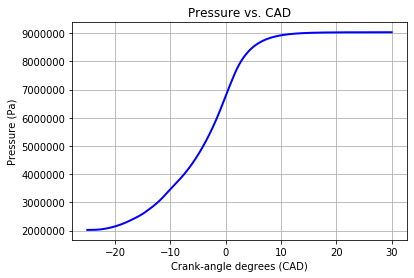

In [17]:
# plot the time evolution of pressure
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[0,:], label='pressure', ls='solid',  color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Pressure (Pa)',
       title ='Pressure vs. CAD')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("P_vs_CAD.pdf")

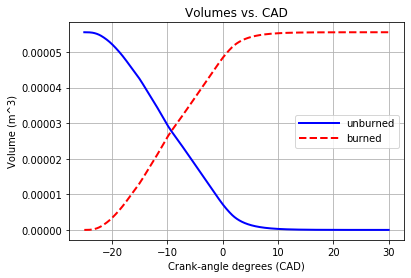

In [18]:
# plot the time evolution of volumes
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, vchamb-solution.y[1,:], label='unburned', ls='solid',  color='blue', lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[1,:],        label='burned',   ls='dashed', color='red',  lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Volume (m^3)',
       title ='Volumes vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Vs_vs_CAD.pdf")

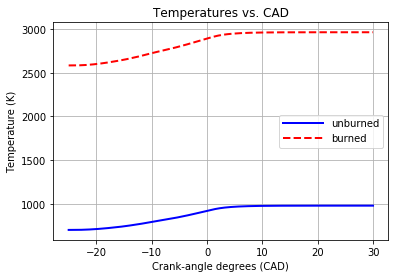

In [19]:
# plot the time evolution of temperatures
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[2,:], label='unburned', ls='solid',  color='blue', lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[3,:], label='burned',   ls='dashed', color='red',  lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Temperature (K)',
       title ='Temperatures vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Ts_vs_CAD.pdf")

In an engine, the pressure would typically peak a few crank-angle degrees after TDC, then would decrease as a consequence of volume expansion and heat losses to walls. Our constant-volume model ignores the volume change, and wall heat transfer has been disabled in the current model setup (wall heat transfer coefficient ch=0 here).

It is also of interest to examine quantities for which ODEs were not solved. This could have been done by storing quantities of interest in tables over the course of solving the equations. Here we will do it by recomputing some quantities of interest at the instants that are available in "solution".

In [20]:
# define arrays to hold computed values of interest
nsoln = len(solution.t) # number of instants at which solution was saved
mu    = np.zeros(nsoln) # unburned-gas mass (kg)
mb    = np.zeros(nsoln) # burned-gas mass (kg)
mbf   = np.zeros(nsoln) # mass-burned fraction (-)
vbf   = np.zeros(nsoln) # volume-burned fraction (-)
afl   = np.zeros(nsoln) # flame area (m^2)
awb   = np.zeros(nsoln) # wall area exposed to burned gas (m^2)
awu   = np.zeros(nsoln) # wall area exposed to unburned gas (m^2)
qu    = np.zeros(nsoln) # heat transfer rate from unburned gas to walls (W)
qb    = np.zeros(nsoln) # heat transfer rate from burned gas to walls (W)
mbr   = np.zeros(nsoln) # mass-burning rate (kg/s)

for i, t in enumerate(solution.t):
    ca = 6.*rpm*( t - tim0 ) + ca0
    
    pall = solution.y[0,i]
    vb   = solution.y[1,i]
    tu   = solution.y[2,i]
    tb   = solution.y[3,i]

    vu = vchamb - vb

    [afl[i],awb[i],awu[i]]       = Interpolate_Flame_Table(nflame,vb,FlameTable)  
    [uu,cvu,ru,rhou]             = Unburned_Gas_Props(gas,fuel,air,phi,tu,pall)
    [ub,cvb,rb,rhob,dubdt,dubdp] = Burned_Gas_Props(gas,fuel,air,phi,tb,pall)
    [qu[i],qb[i]]                = Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,Twall,awu[i],awb[i])
    mbr[i]                       = Mass_Burning_Rate_Engine(kflame,phi,tu,pall,stroke,rpm,rhou,afl[i])
    
    mu[i]  = rhou*vu
    mb[i]  = rhob*vb
    mbf[i] = mb[i] / ( mu[i] + mb[i] )
    
    vbf[i] = vb / ( vu + vb )

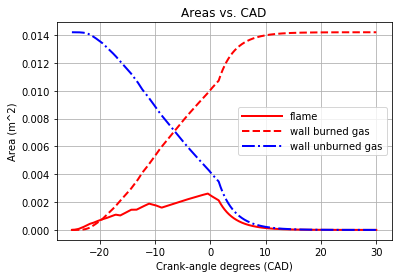

In [21]:
# plot the time evolution of areas
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, afl, label='flame',             ls='solid',  color='red',   lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, awb, label='wall burned gas',   ls='dashed', color='red',   lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, awu, label='wall unburned gas', ls='dashdot', color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Area (m^2)',
       title ='Areas vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("As_vs_CAD.pdf")

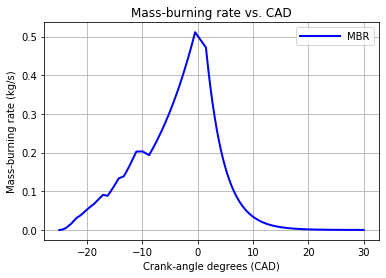

In [22]:
# plot the time evolution of mass-burning rate
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, mbr, label='MBR', ls='solid',  color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Mass-burning rate (kg/s)',
       title ='Mass-burning rate vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("MBR_vs_CAD.pdf")

The discontinuities are consequences of the rather crude discretization scheme that was used to generate the flame table, together with the small value of ninc. For better accuracy in the late burn, in particular, a finer discretization should be used as the burned-gas volume approaches the chamber volume.

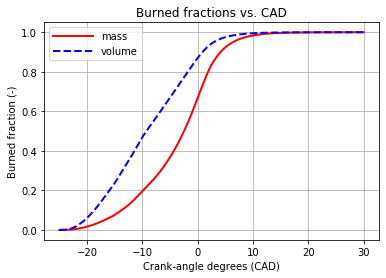

In [23]:
# plot the time evolution of volume- and mass-burned fractions
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, mbf, label='mass',   ls='solid',  color='red',  lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, vbf, label='volume', ls='dashed', color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Burned fraction (-)',
       title ='Burned fractions vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("BFs_vs_CAD.pdf")

This figure reveals an important characteristic of progagation-based premixed combustion in a closed vessel, including in a piston engine. The volume fraction of the burned gas is higher than the mass fraction of the burned gas, because of the density difference between the unburned gas and the burned gas. In terms of the unburned gas, even when it appears visually (on a volume basis) that the flame is close to the walls and that little unburned gas remains in the combustion chamber, it can be misleading to conclude that most of the reactant mass has been converted to product mass. 

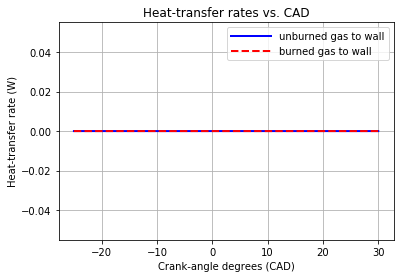

In [24]:
# plot the time evolution of heat-transfer rates
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, qu, label='unburned gas to wall', ls='solid',  color='blue', lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, qb, label='burned gas to wall',   ls='dashed', color='red',  lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Heat-transfer rate (W)',
       title ='Heat-transfer rates vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Qs_vs_CAD.pdf")

Here the wall-heat-transfer rates are equal to zero, because the heat-transfer coefficient ch was set to zero (adiabatic walls). For a non-trivial result, you can rerun with a non-zero value of ch. 

## 3. Laminar flame propagation

We next repeat the above calculation, assuming laminar flame propagation (kflame=1) instead of turbulent. Note that there is no need to regenerate the flame table; we can simply read in the table that was generated earlier.

In [25]:
# specify laminar flame propagation, leaving all other input quantities unchanges
kflame = 1

# use a previously generated flame table
newtable = 0

if newtable==1:
    
# define a Pandas DataFrame that holds the flame table generated by Create_Flame_Table_Pancake_Engine
    VariableNames = ['vburned', 'aburning', 'careab', 'careau']
    FlameTable    = pd.DataFrame(columns=VariableNames)

# generate the flame table, and time how long that takes
    ctim0 = time.time()
    [nflame,vchamb,achamb] = Create_Flame_Table_Pancake_Engine(ninc,bore,clear,xign,yign,zign,FlameTable)
    ctim1 = time.time()
    
# write out the flame table as a .csv file
    FlameTable.to_csv('FlameTable.csv')
    
# print some output
    print(" ")
    print('Created a new flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    print(" ")
    print("Flame table generation required {:.2f} s".format(ctim1-ctim0))
    
else:

# read in a previously generated flame table
    nflame = 0
    vchamb = 0.
    achamb = 0.
    FlameTable = pd.read_csv('FlameTable.csv')
    nflame = FlameTable.shape[0]
    vchamb = FlameTable['vburned'].values[nflame-1]
    achamb = FlameTable['careab'].values[nflame-1]

# print some output
    print('Read in a flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    
# define an array that contains the initial and the final time instants; this array will be passed
#   as an argument to the ODE solver
ntim  = np.int( np.rint( ( timf - tim0 ) / dtim ) + 1 )
tspan = [tim0,timf]
tarr  = np.linspace(tim0,timf,ntim)
    
# initialize the simulation
ctim0 = time.time()

[P0,Vb0,Tu0,Tb0] = Initialize()
print('P0,Vb0,Tu0,Tb0=',P0,Vb0,Tu0,Tb0)

# load the initial conditions into an array; this array will be passed as an argument to the ODE solver
ics = [P0,Vb0,Tu0,Tb0]
  
# load the constant problem parameters into an array; this array will be passed as an argument to the ODE solver
params = [gas, fuel, air, phi, FlameTable, vchamb, nflame, ch, rpm, Twall, kflame, stroke, tim0, ca0]

# call the ODE solver
# see Cantera tutorial Notebook 4.1_ODE_integration-thermal_NO and Cantera tutorial Notebook 10.1_1D_spray_combustion
# note that the default solver is used, with tolerances that are tighter than the default values 
ctim1 = time.time()
solution = solve_ivp(lambda t,y:Two_Zone_Equations(t,y,params),tspan,ics,t_eval=tarr,
                     rtol=1.e-6,atol=1.e-9)

ctim2 = time.time()

# print computer time required for initialization (mostly flame table generation) and for solving the system of equations
print(" ")
print("Initialization required {:.2f} s; solution required {:.2f} s".format(ctim1-ctim0,ctim2-ctim1))

# print "solution"
solution

Read in a flame table, nflame,vchamb,achamb= 26 5.553217404562075e-05 0.014200501449050438
P0,Vb0,Tu0,Tb0= 2025500.0 1e-09 700.0 2584.705158967949
 
Initialization required 0.00 s; solution required 0.13 s


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 152
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 8.33333333e-07, 1.66666667e-06, ...,
       4.58166667e-03, 4.58250000e-03, 4.58333333e-03])
 t_events: None
        y: array([[2.02550000e+06, 2.02550026e+06, 2.02550051e+06, ...,
        2.67435806e+06, 2.67464380e+06, 2.67492966e+06],
       [1.00000000e-09, 1.00729687e-09, 1.01452850e-09, ...,
        1.45860959e-05, 1.45912101e-05, 1.45963255e-05],
       [7.00000000e+02, 7.00000021e+02, 7.00000041e+02, ...,
        7.46415711e+02, 7.46433995e+02, 7.46452285e+02],
       [2.58470516e+03, 2.58470521e+03, 2.58470526e+03, ...,
        2.65808431e+03, 2.65811219e+03, 2.65814008e+03]])

Then recompute various quantities of interest for the laminar case:

In [26]:
# define arrays to hold computed values of interest
nsoln = len(solution.t) # number of instants at which solution was saved
mu    = np.zeros(nsoln) # unburned-gas mass (kg)
mb    = np.zeros(nsoln) # burned-gas mass (kg)
mbf   = np.zeros(nsoln) # mass-burned fraction (-)
vbf   = np.zeros(nsoln) # volume-burned fraction (-)
afl   = np.zeros(nsoln) # flame area (m^2)
awb   = np.zeros(nsoln) # wall area exposed to burned gas (m^2)
awu   = np.zeros(nsoln) # wall area exposed to unburned gas (m^2)
qu    = np.zeros(nsoln) # heat transfer rate from unburned gas to walls (W)
qb    = np.zeros(nsoln) # heat transfer rate from burned gas to walls (W)
mbr   = np.zeros(nsoln) # mass-burning rate (kg/s)

for i, t in enumerate(solution.t):
    ca = 6.*rpm*( t - tim0 ) + ca0
    
    pall = solution.y[0,i]
    vb   = solution.y[1,i]
    tu   = solution.y[2,i]
    tb   = solution.y[3,i]

    vu = vchamb - vb

    [afl[i],awb[i],awu[i]]       = Interpolate_Flame_Table(nflame,vb,FlameTable)  
    [uu,cvu,ru,rhou]             = Unburned_Gas_Props(gas,fuel,air,phi,tu,pall)
    [ub,cvb,rb,rhob,dubdt,dubdp] = Burned_Gas_Props(gas,fuel,air,phi,tb,pall)
    [qu[i],qb[i]]                = Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,Twall,awu[i],awb[i])
    mbr[i]                       = Mass_Burning_Rate_Engine(kflame,phi,tu,pall,stroke,rpm,rhou,afl[i])
    
    mu[i]  = rhou*vu
    mb[i]  = rhob*vb
    mbf[i] = mb[i] / ( mu[i] + mb[i] )
    
    vbf[i] = vb / ( vu + vb )

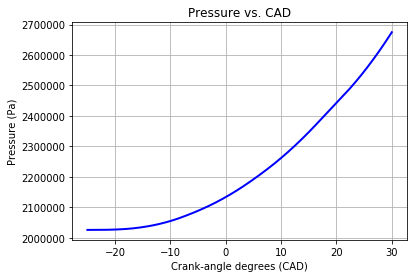

In [27]:
# plot the time evolution of pressure
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[0,:], label='pressure', ls='solid',  color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Pressure (Pa)',
       title ='Pressure vs. CAD')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("P_vs_CAD_lam.pdf")

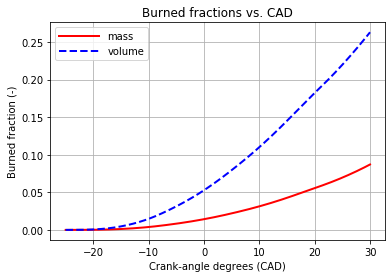

In [28]:
# plot the time evolution of volume- and mass-burned fractions
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, mbf, label='mass',   ls='solid',  color='red',  lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, vbf, label='volume', ls='dashed', color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Burned fraction (-)',
       title ='Burned fractions vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("BFs_vs_CAD_lam.pdf")

The burn rate is significantly lower compared to the turbulent case. Less than 10% of the reactant mass has burned by 30 CAD after TDC. Even allowing for the limitations of the model, it is clear that for the given conditions (which are reasonably representative of those in an engine), laminar flame propagation is far too slow for the engine to operate as intended.

## 4. Scaling with engine speed

Now let's look at how the combustion processes scales with a change in engine speed. First, we increase the engine speed by a factor of three, for the case of laminar flame propagation:

In [29]:
# consider a higher engine speed, with laminar flame propagation
kflame = 1
rpm    = 6000.

# recompute derived quantities that depend on rpm
dtim = dCA / ( 6.*rpm )                                           # (s) - computational time step in seconds

# initial and final crank angles and times
ca0  = caign                                                      # (CAD) - begin at the time of ignition
caf  = CAf                                                        # (CAD) - end at the specified end time in CAD
tim0 = 0.                                                         # (s)   - initial time in seconds
timf = ( caf - ca0 ) / ( 6.*rpm )                                 # (s)   - final time in seconds

# use a previously generated flame table
newtable = 0

if newtable==1:
    
# define a Pandas DataFrame that holds the flame table generated by Create_Flame_Table_Pancake_Engine
    VariableNames = ['vburned', 'aburning', 'careab', 'careau']
    FlameTable    = pd.DataFrame(columns=VariableNames)

# generate the flame table, and time how long that takes
    ctim0 = time.time()
    [nflame,vchamb,achamb] = Create_Flame_Table_Pancake_Engine(ninc,bore,clear,xign,yign,zign,FlameTable)
    ctim1 = time.time()
    
# write out the flame table as a .csv file
    FlameTable.to_csv('FlameTable.csv')
    
# print some output
    print(" ")
    print('Created a new flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    print(" ")
    print("Flame table generation required {:.2f} s".format(ctim1-ctim0))
    
else:

# read in a previously generated flame table
    nflame = 0
    vchamb = 0.
    achamb = 0.
    FlameTable = pd.read_csv('FlameTable.csv')
    nflame = FlameTable.shape[0]
    vchamb = FlameTable['vburned'].values[nflame-1]
    achamb = FlameTable['careab'].values[nflame-1]

# print some output
    print('Read in a flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    
# define an array that contains the initial and the final time instants; this array will be passed
#   as an argument to the ODE solver
ntim  = np.int( np.rint( ( timf - tim0 ) / dtim ) + 1 )
tspan = [tim0,timf]
tarr  = np.linspace(tim0,timf,ntim)
    
# initialize the simulation
ctim0 = time.time()

[P0,Vb0,Tu0,Tb0] = Initialize()
print('P0,Vb0,Tu0,Tb0=',P0,Vb0,Tu0,Tb0)

# load the initial conditions into an array; this array will be passed as an argument to the ODE solver
ics = [P0,Vb0,Tu0,Tb0]
  
# load the constant problem parameters into an array; this array will be passed as an argument to the ODE solver
params = [gas, fuel, air, phi, FlameTable, vchamb, nflame, ch, rpm, Twall, kflame, stroke, tim0, ca0]

# call the ODE solver
# see Cantera tutorial Notebook 4.1_ODE_integration-thermal_NO and Cantera tutorial Notebook 10.1_1D_spray_combustion
# note that the default solver is used, with tolerances that are tighter than the default values 
ctim1 = time.time()
solution = solve_ivp(lambda t,y:Two_Zone_Equations(t,y,params),tspan,ics,t_eval=tarr,
                     rtol=1.e-6,atol=1.e-9)

ctim2 = time.time()

# print computer time required for initialization (mostly flame table generation) and for solving the system of equations
print(" ")
print("Initialization required {:.2f} s; solution required {:.2f} s".format(ctim1-ctim0,ctim2-ctim1))

# print "solution"
solution

Read in a flame table, nflame,vchamb,achamb= 26 5.553217404562075e-05 0.014200501449050438
P0,Vb0,Tu0,Tb0= 2025500.0 1e-09 700.0 2584.705158967949
 
Initialization required 0.00 s; solution required 0.05 s


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.77777778e-07, 5.55555556e-07, ...,
       1.52722222e-03, 1.52750000e-03, 1.52777778e-03])
 t_events: None
        y: array([[2.02550000e+06, 2.02550009e+06, 2.02550017e+06, ...,
        2.07626323e+06, 2.07628706e+06, 2.07631091e+06],
       [1.00000000e-09, 1.00244835e-09, 1.00490661e-09, ...,
        1.41087239e-06, 1.41152098e-06, 1.41216969e-06],
       [7.00000000e+02, 7.00000007e+02, 7.00000014e+02, ...,
        7.04042652e+02, 7.04044531e+02, 7.04046411e+02],
       [2.58470516e+03, 2.58470518e+03, 2.58470519e+03, ...,
        2.59131726e+03, 2.59132032e+03, 2.59132338e+03]])

In [30]:
# define arrays to hold computed values of interest
nsoln = len(solution.t) # number of instants at which solution was saved
mu    = np.zeros(nsoln) # unburned-gas mass (kg)
mb    = np.zeros(nsoln) # burned-gas mass (kg)
mbf   = np.zeros(nsoln) # mass-burned fraction (-)
vbf   = np.zeros(nsoln) # volume-burned fraction (-)
afl   = np.zeros(nsoln) # flame area (m^2)
awb   = np.zeros(nsoln) # wall area exposed to burned gas (m^2)
awu   = np.zeros(nsoln) # wall area exposed to unburned gas (m^2)
qu    = np.zeros(nsoln) # heat transfer rate from unburned gas to walls (W)
qb    = np.zeros(nsoln) # heat transfer rate from burned gas to walls (W)
mbr   = np.zeros(nsoln) # mass-burning rate (kg/s)

for i, t in enumerate(solution.t):
    ca = 6.*rpm*( t - tim0 ) + ca0
    
    pall = solution.y[0,i]
    vb   = solution.y[1,i]
    tu   = solution.y[2,i]
    tb   = solution.y[3,i]

    vu = vchamb - vb

    [afl[i],awb[i],awu[i]]       = Interpolate_Flame_Table(nflame,vb,FlameTable)  
    [uu,cvu,ru,rhou]             = Unburned_Gas_Props(gas,fuel,air,phi,tu,pall)
    [ub,cvb,rb,rhob,dubdt,dubdp] = Burned_Gas_Props(gas,fuel,air,phi,tb,pall)
    [qu[i],qb[i]]                = Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,Twall,awu[i],awb[i])
    mbr[i]                       = Mass_Burning_Rate_Engine(kflame,phi,tu,pall,stroke,rpm,rhou,afl[i])
    
    mu[i]  = rhou*vu
    mb[i]  = rhob*vb
    mbf[i] = mb[i] / ( mu[i] + mb[i] )
    
    vbf[i] = vb / ( vu + vb )

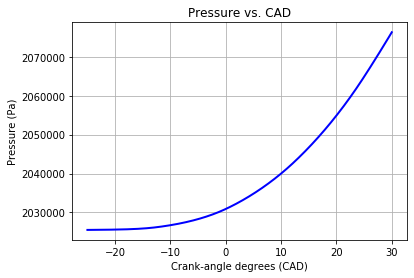

In [31]:
# plot the time evolution of pressure
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[0,:], label='pressure', ls='solid',  color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Pressure (Pa)',
       title ='Pressure vs. CAD')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("P_vs_CAD_lam_6000.pdf")

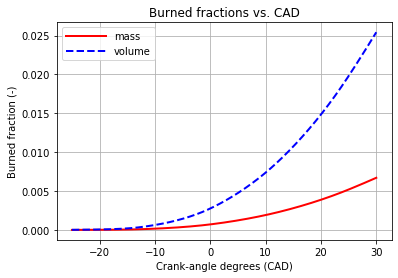

In [32]:
# plot the time evolution of volume- and mass-burned fractions
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, mbf, label='mass',   ls='solid',  color='red',  lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, vbf, label='volume', ls='dashed', color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Burned fraction (-)',
       title ='Burned fractions vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("BFs_vs_CAD_lam_6000.pdf")

Now less than 1% of the reactant mass has burned by 30 CAD after TDC. With laminar flame propagation, the burn duration in CAD increases with increasing engine speed. This is inconsistent with the observation that, in a real engine, the burn duration in CAD varies only weakly with engine speed.

Next, let's look at turbulent flame propagation at the higher engine speed:

In [33]:
# consider a higher engine speed, with turbulent flame propagation
kflame = 2
rpm    = 6000.

# use a previously generated flame table
newtable = 0

if newtable==1:
    
# define a Pandas DataFrame that holds the flame table generated by Create_Flame_Table_Pancake_Engine
    VariableNames = ['vburned', 'aburning', 'careab', 'careau']
    FlameTable    = pd.DataFrame(columns=VariableNames)

# generate the flame table, and time how long that takes
    ctim0 = time.time()
    [nflame,vchamb,achamb] = Create_Flame_Table_Pancake_Engine(ninc,bore,clear,xign,yign,zign,FlameTable)
    ctim1 = time.time()
    
# write out the flame table as a .csv file
    FlameTable.to_csv('FlameTable.csv')
    
# print some output
    print(" ")
    print('Created a new flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    print(" ")
    print("Flame table generation required {:.2f} s".format(ctim1-ctim0))
    
else:

# read in a previously generated flame table
    nflame = 0
    vchamb = 0.
    achamb = 0.
    FlameTable = pd.read_csv('FlameTable.csv')
    nflame = FlameTable.shape[0]
    vchamb = FlameTable['vburned'].values[nflame-1]
    achamb = FlameTable['careab'].values[nflame-1]

# print some output
    print('Read in a flame table, nflame,vchamb,achamb=',nflame,vchamb,achamb)
    
# define an array that contains the initial and the final time instants; this array will be passed
#   as an argument to the ODE solver
ntim  = np.int( np.rint( ( timf - tim0 ) / dtim ) + 1 )
tspan = [tim0,timf]
tarr  = np.linspace(tim0,timf,ntim)
    
# initialize the simulation
ctim0 = time.time()

[P0,Vb0,Tu0,Tb0] = Initialize()
print('P0,Vb0,Tu0,Tb0=',P0,Vb0,Tu0,Tb0)

# load the initial conditions into an array; this array will be passed as an argument to the ODE solver
ics = [P0,Vb0,Tu0,Tb0]
  
# load the constant problem parameters into an array; this array will be passed as an argument to the ODE solver
params = [gas, fuel, air, phi, FlameTable, vchamb, nflame, ch, rpm, Twall, kflame, stroke, tim0, ca0]

# call the ODE solver
# see Cantera tutorial Notebook 4.1_ODE_integration-thermal_NO and Cantera tutorial Notebook 10.1_1D_spray_combustion
# note that the default solver is used, with tolerances that are tighter than the default values 
ctim1 = time.time()
solution = solve_ivp(lambda t,y:Two_Zone_Equations(t,y,params),tspan,ics,t_eval=tarr,
                     rtol=1.e-6,atol=1.e-9)

ctim2 = time.time()

# print computer time required for initialization (mostly flame table generation) and for solving the system of equations
print(" ")
print("Initialization required {:.2f} s; solution required {:.2f} s".format(ctim1-ctim0,ctim2-ctim1))

# print "solution"
solution

Read in a flame table, nflame,vchamb,achamb= 26 5.553217404562075e-05 0.014200501449050438
P0,Vb0,Tu0,Tb0= 2025500.0 1e-09 700.0 2584.705158967949
 
Initialization required 0.00 s; solution required 0.40 s


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 470
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.77777778e-07, 5.55555556e-07, ...,
       1.52722222e-03, 1.52750000e-03, 1.52777778e-03])
 t_events: None
        y: array([[2.02550000e+06, 2.02550119e+06, 2.02550235e+06, ...,
        9.03286764e+06, 9.03287627e+06, 9.03288488e+06],
       [1.00000000e-09, 1.03366505e-09, 1.06659274e-09, ...,
        5.55234793e-05, 5.55235014e-05, 5.55235235e-05],
       [7.00000000e+02, 7.00000096e+02, 7.00000189e+02, ...,
        9.77928492e+02, 9.77928693e+02, 9.77928894e+02],
       [2.58470516e+03, 2.58470540e+03, 2.58470565e+03, ...,
        2.96483439e+03, 2.96483462e+03, 2.96483486e+03]])

In [34]:
# define arrays to hold computed values of interest
nsoln = len(solution.t) # number of instants at which solution was saved
mu    = np.zeros(nsoln) # unburned-gas mass (kg)
mb    = np.zeros(nsoln) # burned-gas mass (kg)
mbf   = np.zeros(nsoln) # mass-burned fraction (-)
vbf   = np.zeros(nsoln) # volume-burned fraction (-)
afl   = np.zeros(nsoln) # flame area (m^2)
awb   = np.zeros(nsoln) # wall area exposed to burned gas (m^2)
awu   = np.zeros(nsoln) # wall area exposed to unburned gas (m^2)
qu    = np.zeros(nsoln) # heat transfer rate from unburned gas to walls (W)
qb    = np.zeros(nsoln) # heat transfer rate from burned gas to walls (W)
mbr   = np.zeros(nsoln) # mass-burning rate (kg/s)

for i, t in enumerate(solution.t):
    ca = 6.*rpm*( t - tim0 ) + ca0
    
    pall = solution.y[0,i]
    vb   = solution.y[1,i]
    tu   = solution.y[2,i]
    tb   = solution.y[3,i]

    vu = vchamb - vb

    [afl[i],awb[i],awu[i]]       = Interpolate_Flame_Table(nflame,vb,FlameTable)  
    [uu,cvu,ru,rhou]             = Unburned_Gas_Props(gas,fuel,air,phi,tu,pall)
    [ub,cvb,rb,rhob,dubdt,dubdp] = Burned_Gas_Props(gas,fuel,air,phi,tb,pall)
    [qu[i],qb[i]]                = Wall_Heat_Transfer_Rates_Engine(ch,rpm,tu,tb,Twall,awu[i],awb[i])
    mbr[i]                       = Mass_Burning_Rate_Engine(kflame,phi,tu,pall,stroke,rpm,rhou,afl[i])
    
    mu[i]  = rhou*vu
    mb[i]  = rhob*vb
    mbf[i] = mb[i] / ( mu[i] + mb[i] )
    
    vbf[i] = vb / ( vu + vb )

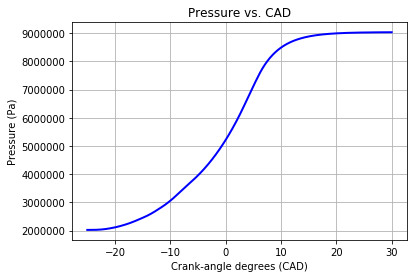

In [35]:
# plot the time evolution of pressure
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, solution.y[0,:], label='pressure', ls='solid',  color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Pressure (Pa)',
       title ='Pressure vs. CAD')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("P_vs_CAD_6000.pdf")

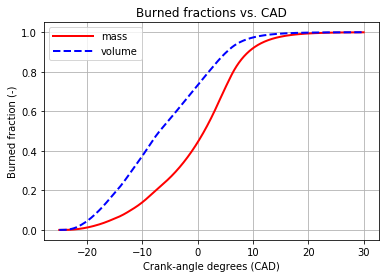

In [36]:
# plot the time evolution of volume- and mass-burned fractions
fig, ax = plt.subplots()
ax.plot(6.*rpm*(solution.t - tim0)+ca0, mbf, label='mass',   ls='solid',  color='red',  lw=2)
ax.plot(6.*rpm*(solution.t - tim0)+ca0, vbf, label='volume', ls='dashed', color='blue', lw=2)
ax.set(xlabel='Crank-angle degrees (CAD)',
       ylabel='Burned fraction (-)',
       title ='Burned fractions vs. CAD')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("BFs_vs_CAD_6000.pdf")

The 6000 r/min results are very similar to those that we saw earlier for 2000 r/min. In the case of turbulent flame propagation, the mass burning rate (or turbulent flame speed) increases in proportion to the rms turbulence velocity. And in an engine, the rms turbulence velocity is proportional to the mean piston speed, which in turn is proportional to the crankshaft rotational speed. Therefore, to a first approximation, the burn duration in crank-angle degrees of rotation remains approximately constant. 

It is this scaling that allows an automotive piston engine to operate over approximately a factor-of-ten range in engine speed (from ~600 r/min at idle, to ~6000 r/min maximum) with relatively small changes in ignition timing.  

## 5. What's next

The relevance of the results to engines is limited by the constant-volume simplification that has been made here. The same general approach that has been used here could be used to solve the equations that account for a time-varying volume. In that case, the flame table would need to be generated for multiple piston positions, for example. 

The late-burn results, in particular, are affected by the crude discretization method that has been used to generate the flame table. This could be mitigated by using a more accurate method to construct the flame table.

In spite of these limitations, the present model can provide useful insights into differences between laminar and turbulent flame propagation, and the influence of engine speed. Other parameter studies can be performed to look at variations in the initial conditions (e.g., presssure, temperature, and reactant composition), spark location, etc.